# Regularization

## Jorge Alberto Padilla Gutierrez

# Includes

In [285]:
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo 
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split


### The UCI Has its own guide on the instalation and usage of the dataset selected
pip install ucimlrepo
#### I do multiple data sets since some results are weird :(

# Algorithm

# CPU Performance

In [286]:
# fetch dataset 
computer_hardware = fetch_ucirepo(id=29) 

X = computer_hardware.data.features
X = X.drop(['VendorName','ModelName','PRP','ERP'], axis=1)
X = np.array(X)
y = computer_hardware.data.features['ERP']
y = np.array(y)

In [287]:
print(X)
print(y)
print(X.shape)
print(y.shape)

[[  125   256  6000   256    16   128]
 [   29  8000 32000    32     8    32]
 [   29  8000 32000    32     8    32]
 ...
 [  125  2000  8000     0     2    14]
 [  480   512  8000    32     0     0]
 [  480  1000  4000     0     0     0]]
[ 199  253  253  253  132  290  381  381  749 1238   23   24   70  117
   15   64   23   29   22  124   35   39   40   45   28   21   28   22
   28   27  102  102   74   74  138  136   23   29   44   30   41   74
   74   74   54   41   18   28   36   38   34   19   72   36   30   56
   42   34   34   34   34   34   19   75  113  157   18   20   28   33
   47   54   20   23   25   52   27   50   18   53   23   30   73   20
   25   28   29   32  175   57  181  181   32   82  171  361  350  220
  113   15   21   35   18   20   20   28   45   18   17   26   28   28
   31   31   42   76   76   26   59   65  101  116   18   20   20   30
   44   44   82   82  128   37   46   46   80   88   88   33   46   29
   53   53   41   86   95  107  117  119  120   48

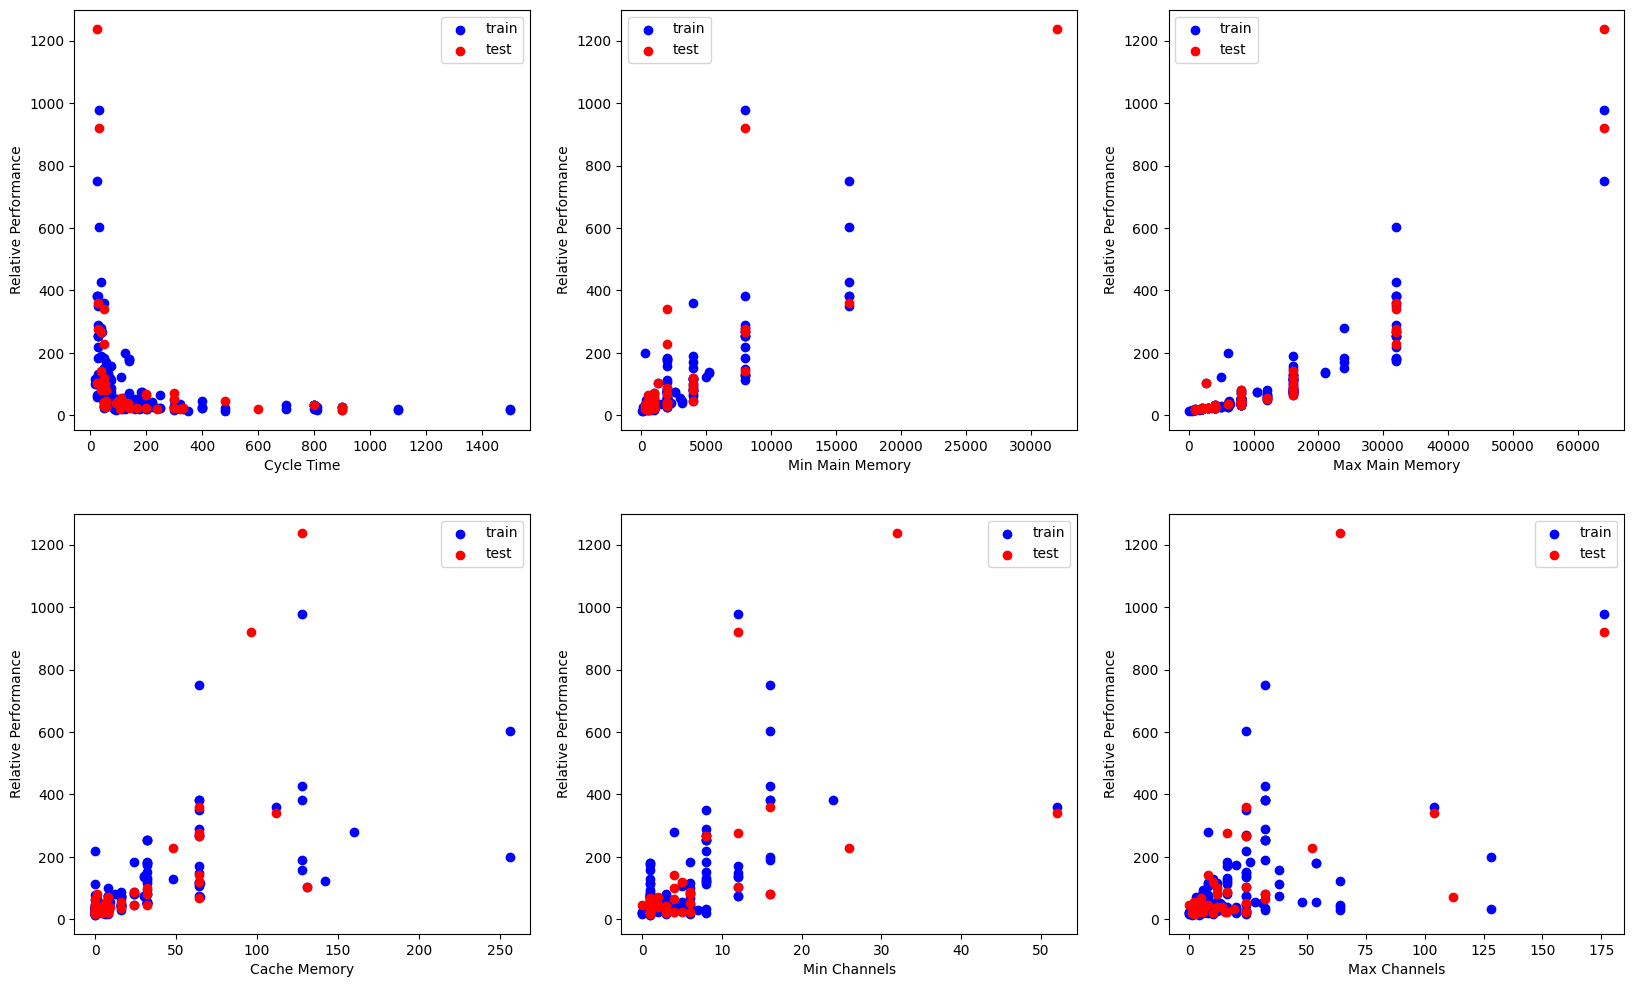

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
plt.scatter(X_train[:,0],y_train, c='b', label='train')
plt.scatter(X_test[:,0],y_test, c='r', label='test')
plt.xlabel('Cycle Time')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,3,2)
plt.scatter(X_train[:,1],y_train, c='b', label='train')
plt.scatter(X_test[:,1],y_test, c='r', label='test')
plt.xlabel('Min Main Memory')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,3,3)
plt.scatter(X_train[:,2],y_train, c='b', label='train')
plt.scatter(X_test[:,2],y_test, c='r', label='test')
plt.xlabel('Max Main Memory')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,3,4)
plt.scatter(X_train[:,3],y_train, c='b', label='train')
plt.scatter(X_test[:,3],y_test, c='r', label='test')
plt.xlabel('Cache Memory')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,3,5)
plt.scatter(X_train[:,4],y_train, c='b', label='train')
plt.scatter(X_test[:,4],y_test, c='r', label='test')
plt.xlabel('Min Channels')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,3,6)
plt.scatter(X_train[:,5],y_train, c='b', label='train')
plt.scatter(X_test[:,5],y_test, c='r', label='test')
plt.xlabel('Max Channels')
plt.ylabel('Relative Performance')
plt.legend()

In [289]:
vanilla = SGDRegressor(penalty=None, eta0=0.0000000001)
ridge = SGDRegressor(penalty="l2", alpha=0.5, eta0=0.0000000001)
lasso = SGDRegressor(penalty="l1", alpha=0.5, eta0=0.0000000001)
elasticnet = SGDRegressor(penalty="elasticnet", alpha=0.5, eta0=0.0000000001)

In [290]:
#X_train = X_train.reshape(-1,1)
#y_train = y_train.reshape(-1)
#X_test = X_test.reshape(-1,1)
#y_test = y_test.reshape(-1)

vanilla.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elasticnet.fit(X_train, y_train)

SGDRegressor(alpha=0.5, eta0=1e-10, penalty='elasticnet')

In [291]:
y_hat_vanilla = vanilla.predict(X_test)
y_hat_ridge = ridge.predict(X_test)
y_hat_lasso = lasso.predict(X_test)
y_hat_elasticnet = elasticnet.predict(X_test)

print(y_hat_vanilla)
print(y_hat_ridge)
print(y_hat_lasso)
print(y_hat_elasticnet)

[ 28.55646669  37.46446741  37.41482652 552.41872308  64.25595845
 300.32551622  69.00150134  10.87524352 697.18062165 264.129971
 138.08627021 150.15010969  75.0347962   75.06440327 129.05036286
  28.15112897  87.1390707   21.73276686 174.28798593 150.14253856
  99.0476127  100.51985828 150.15660219  37.19676523  10.62074905
  75.0475449   18.72111441  43.55387722  18.85383646  75.01707518
 300.32955373  43.53526887  50.31117351  17.25922566  20.15703922
  69.01642111  65.92826944 348.58413467 131.96314386  37.51981114
 264.1460876   87.12424005]
[ 27.15013185  37.34851627  37.32540767 565.74400215  67.55934966
 299.07309595  70.69417006  10.36561736 662.98269923 274.76098947
 141.42714572 149.53065393  74.74642349  74.7602535  135.36985671
  28.0585381   82.86936002  20.6930784  165.74269335 149.52669636
 103.05705264 104.03090439 149.53410829  37.22380437  10.24690255
  74.75233802  18.68403407  41.42705023  18.76095429  74.73896763
 299.07490443  41.4186212   52.05438531  17.685155

In [292]:
print(vanilla.score(X_test, y_test))
print(ridge.score(X_test, y_test))
print(lasso.score(X_test, y_test))
print(elasticnet.score(X_test, y_test))

0.7900633016295074
0.7764684570087064
0.7764026531664694
0.7837138910017448


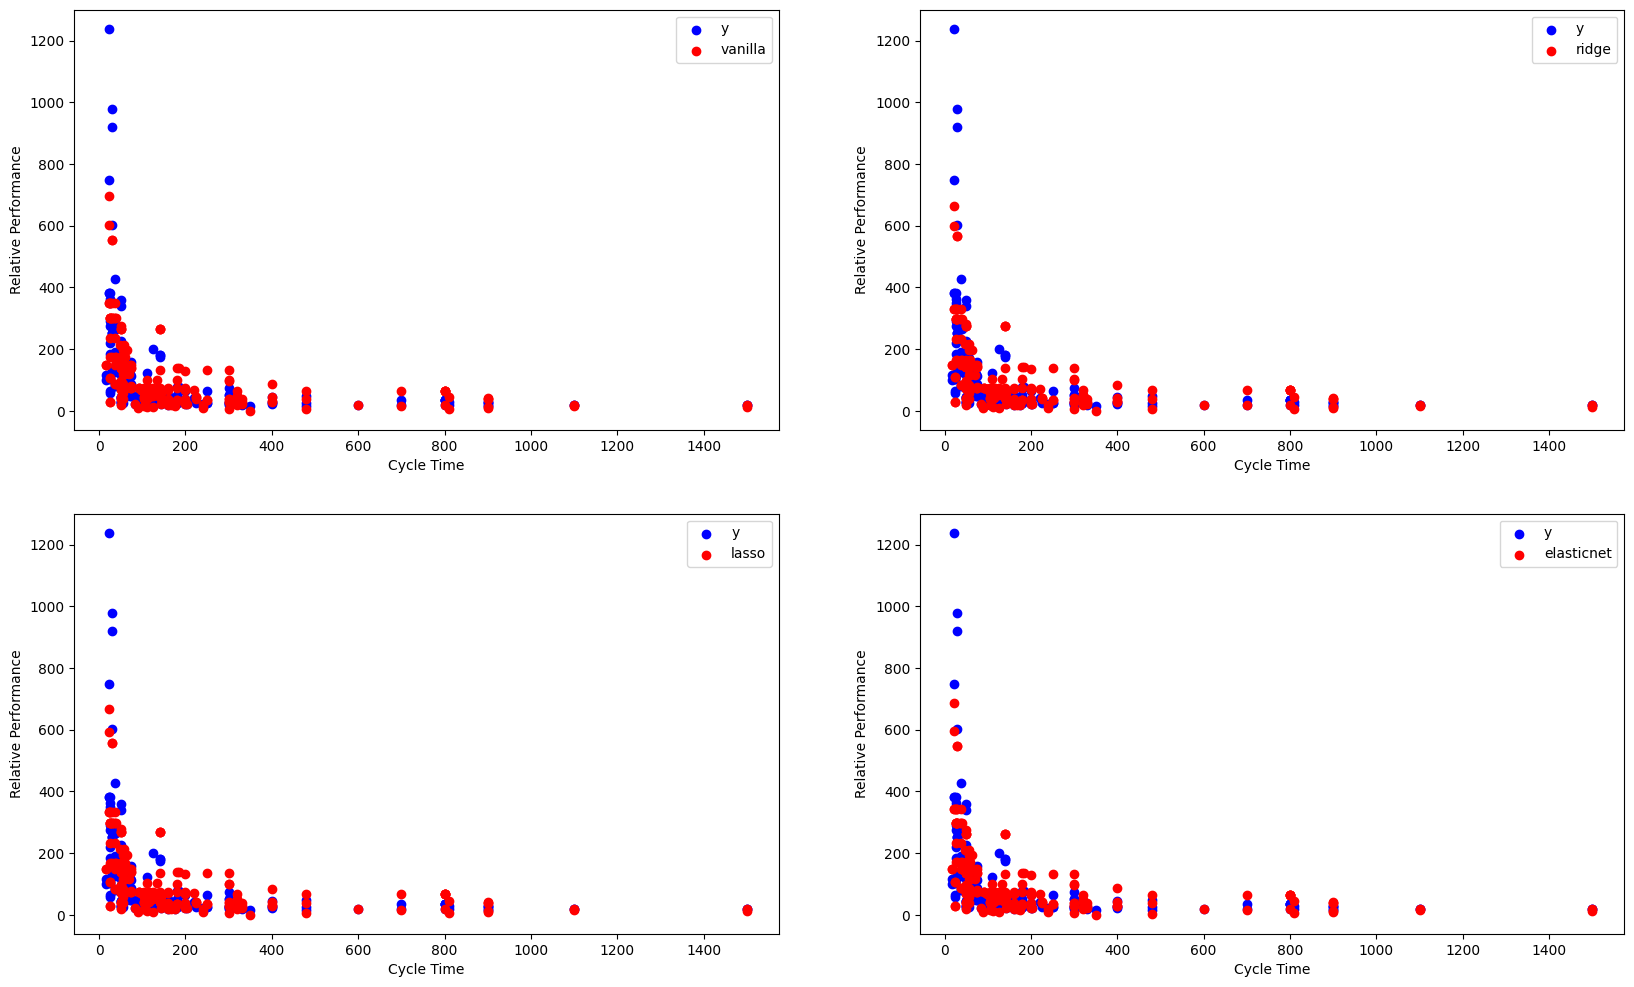

In [293]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.scatter(X[:,0], y, c='b', label='y')
plt.scatter(X[:,0], vanilla.predict(X),label='vanilla',c='r')
plt.xlabel('Cycle Time')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(X[:,0], y, c='b', label='y')
plt.scatter(X[:,0], ridge.predict(X),label='ridge',c='r')
plt.xlabel('Cycle Time')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(X[:,0], y, c='b', label='y')
plt.scatter(X[:,0], lasso.predict(X),label='lasso',c='r')
plt.xlabel('Cycle Time')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(X[:,0], y, c='b', label='y')
plt.scatter(X[:,0], elasticnet.predict(X),label='elasticnet',c='r')
plt.xlabel('Cycle Time')
plt.ylabel('Relative Performance')
plt.legend()

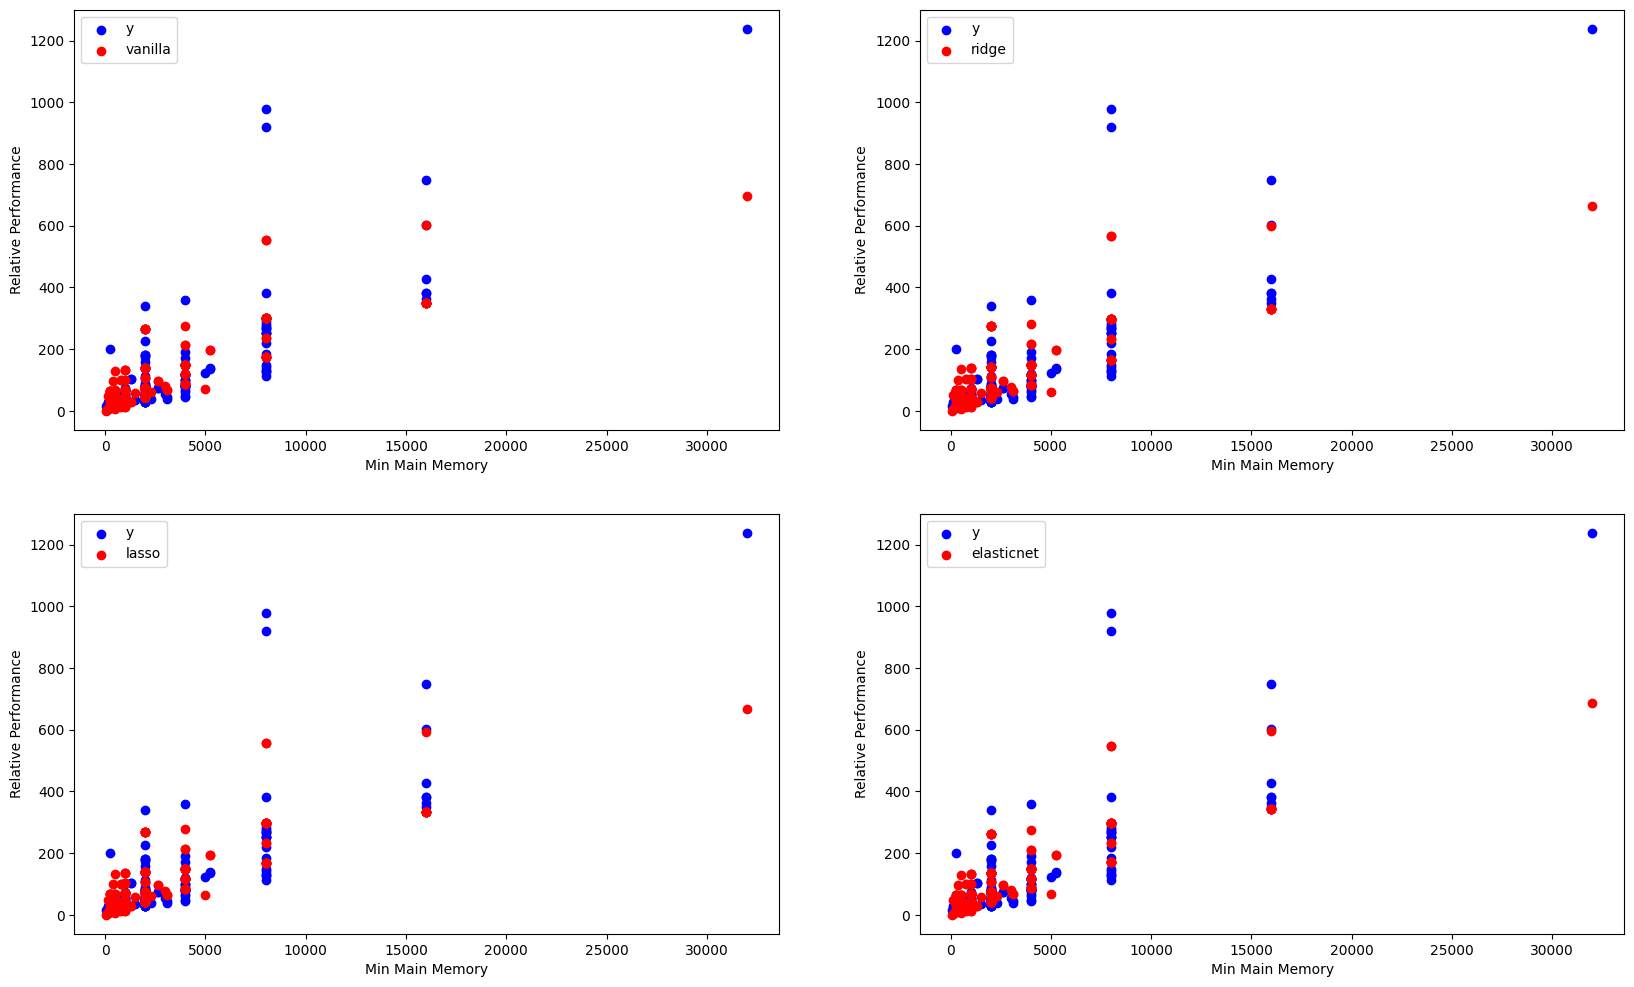

In [294]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.scatter(X[:,1], y, c='b', label='y')
plt.scatter(X[:,1], vanilla.predict(X),label='vanilla',c='r')
plt.xlabel('Min Main Memory')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(X[:,1], y, c='b', label='y')
plt.scatter(X[:,1], ridge.predict(X),label='ridge',c='r')
plt.xlabel('Min Main Memory')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(X[:,1], y, c='b', label='y')
plt.scatter(X[:,1], lasso.predict(X),label='lasso',c='r')
plt.xlabel('Min Main Memory')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(X[:,1], y, c='b', label='y')
plt.scatter(X[:,1], elasticnet.predict(X),label='elasticnet',c='r')
plt.xlabel('Min Main Memory')
plt.ylabel('Relative Performance')
plt.legend()

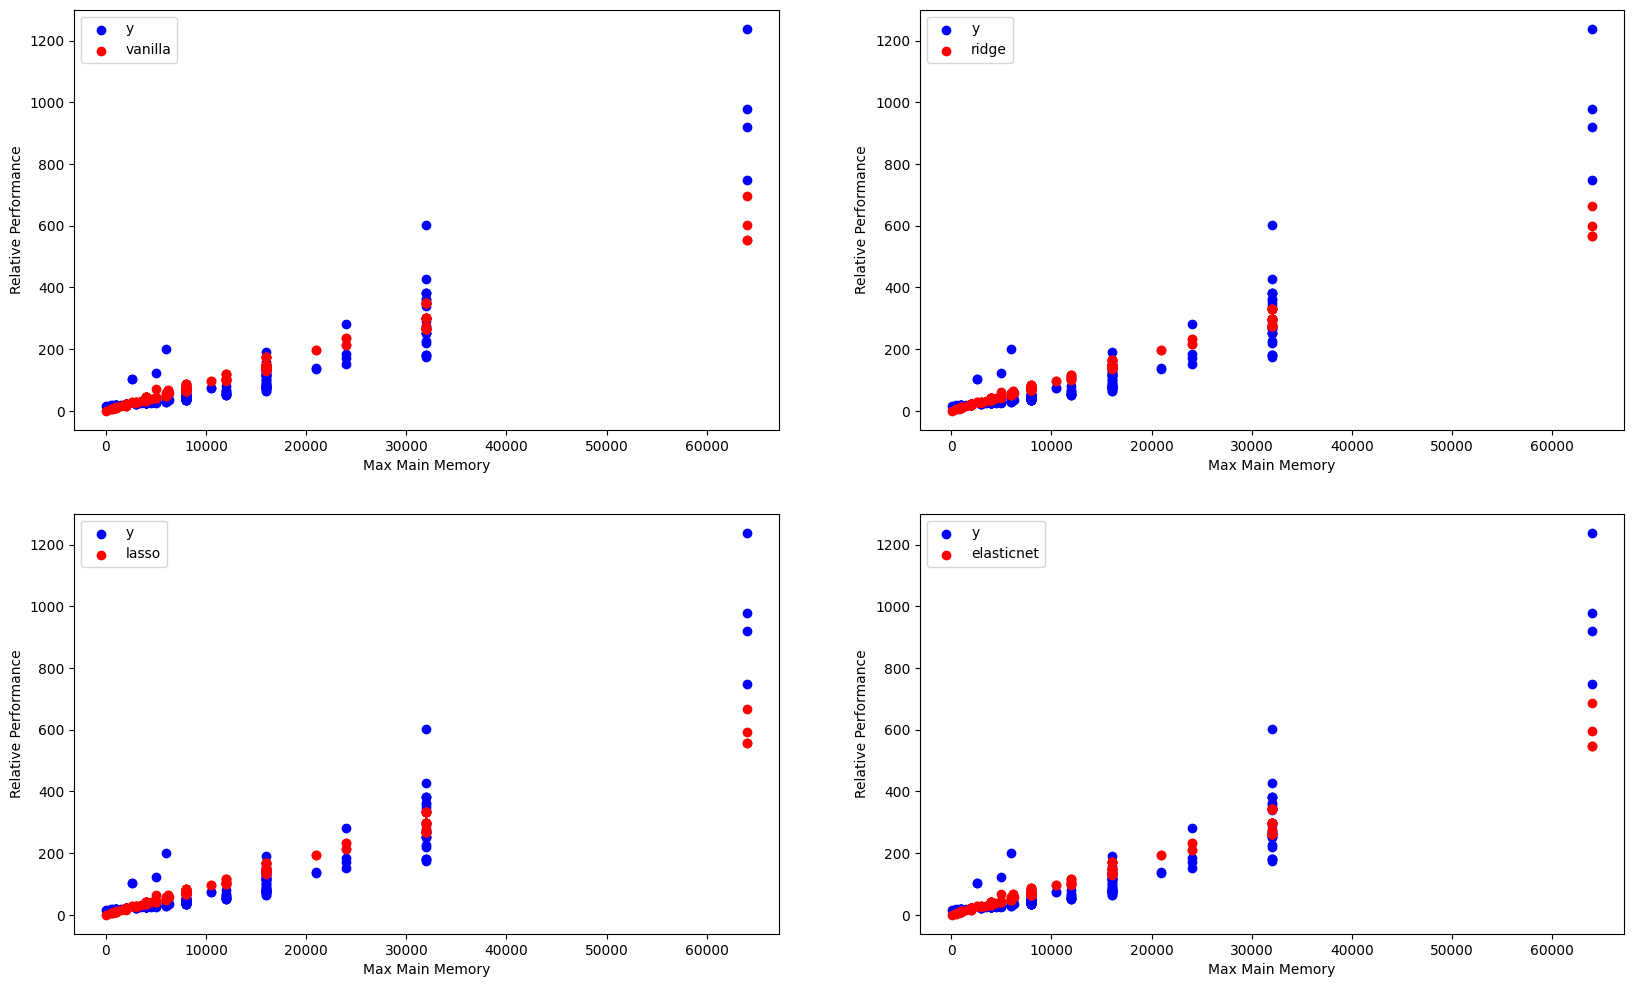

In [295]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.scatter(X[:,2], y, c='b', label='y')
plt.scatter(X[:,2], vanilla.predict(X),label='vanilla',c='r')
plt.xlabel('Max Main Memory')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(X[:,2], y, c='b', label='y')
plt.scatter(X[:,2], ridge.predict(X),label='ridge',c='r')
plt.xlabel('Max Main Memory')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(X[:,2], y, c='b', label='y')
plt.scatter(X[:,2], lasso.predict(X),label='lasso',c='r')
plt.xlabel('Max Main Memory')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(X[:,2], y, c='b', label='y')
plt.scatter(X[:,2], elasticnet.predict(X),label='elasticnet',c='r')
plt.xlabel('Max Main Memory')
plt.ylabel('Relative Performance')
plt.legend()

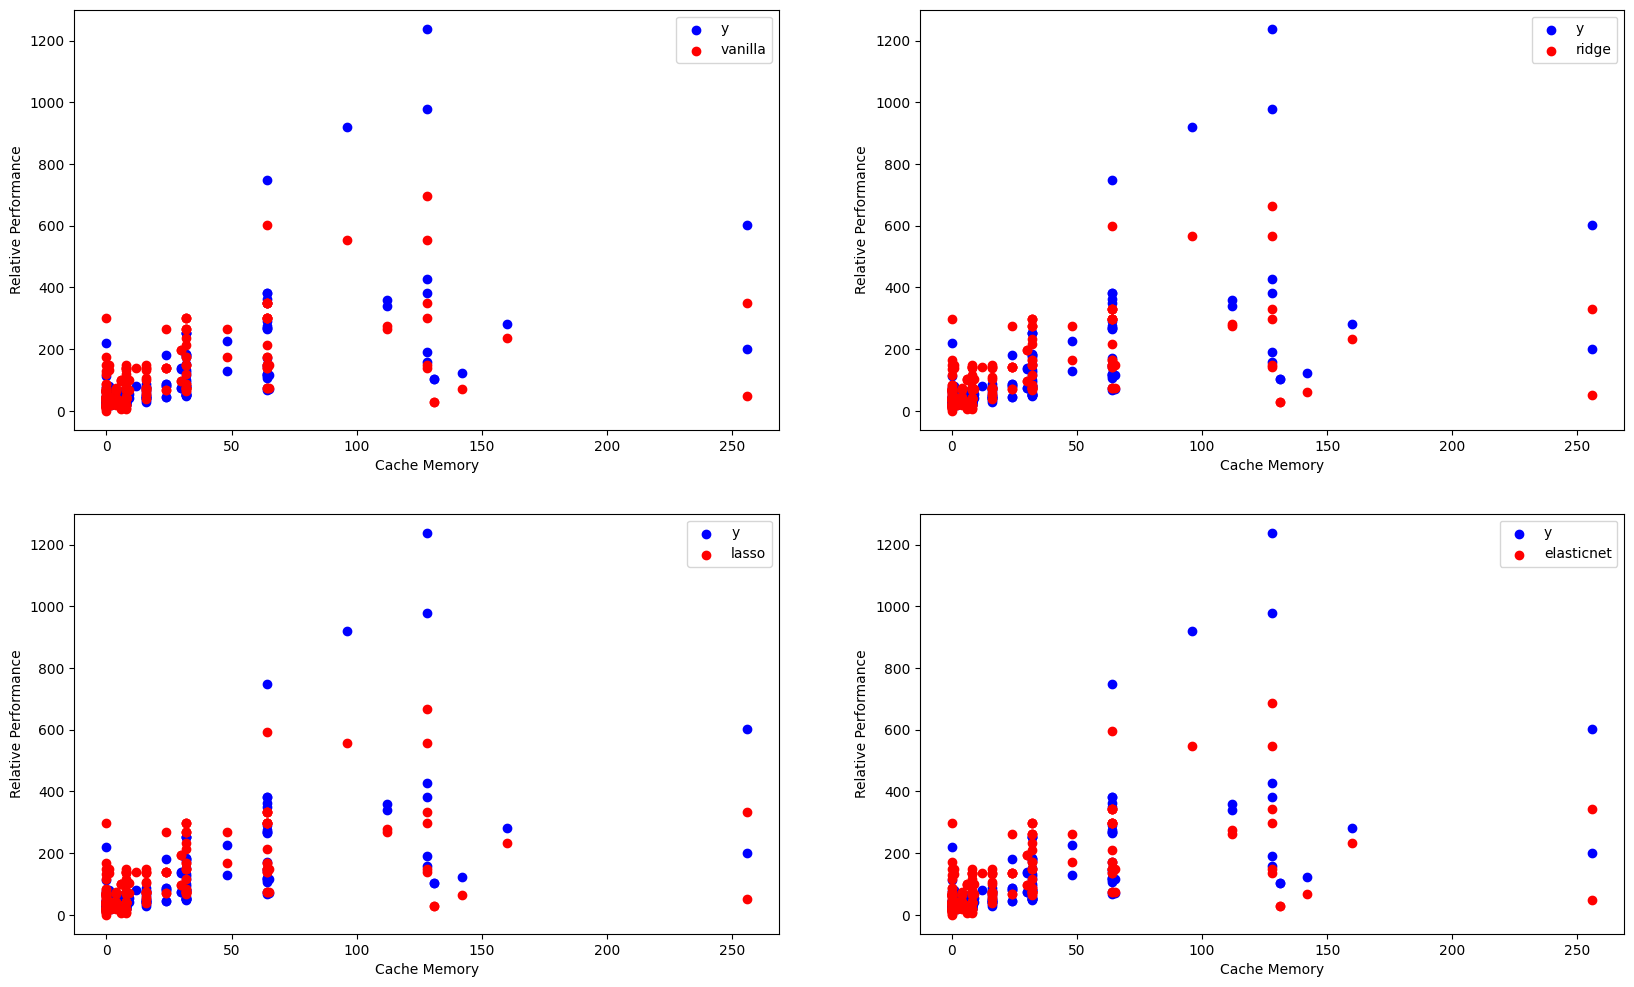

In [296]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.scatter(X[:,3], y, c='b', label='y')
plt.scatter(X[:,3], vanilla.predict(X),label='vanilla',c='r')
plt.xlabel('Cache Memory')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(X[:,3], y, c='b', label='y')
plt.scatter(X[:,3], ridge.predict(X),label='ridge',c='r')
plt.xlabel('Cache Memory')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(X[:,3], y, c='b', label='y')
plt.scatter(X[:,3], lasso.predict(X),label='lasso',c='r')
plt.xlabel('Cache Memory')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(X[:,3], y, c='b', label='y')
plt.scatter(X[:,3], elasticnet.predict(X),label='elasticnet',c='r')
plt.xlabel('Cache Memory')
plt.ylabel('Relative Performance')
plt.legend()

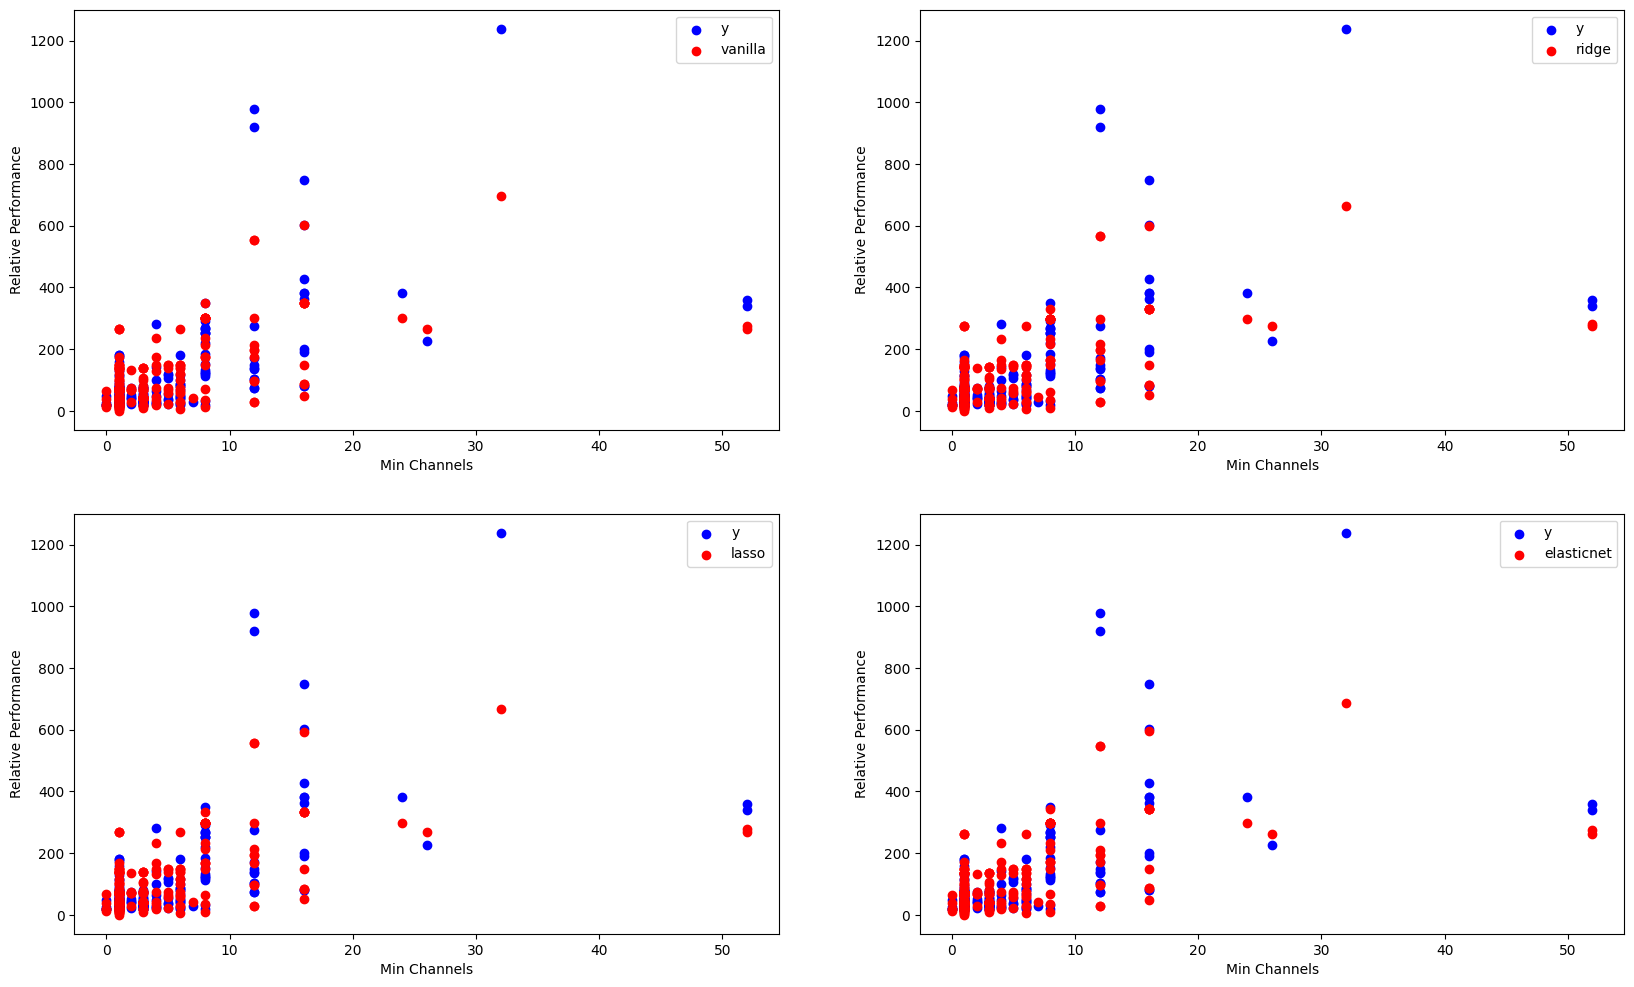

In [297]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.scatter(X[:,4], y, c='b', label='y')
plt.scatter(X[:,4], vanilla.predict(X),label='vanilla',c='r')
plt.xlabel('Min Channels')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(X[:,4], y, c='b', label='y')
plt.scatter(X[:,4], ridge.predict(X),label='ridge',c='r')
plt.xlabel('Min Channels')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(X[:,4], y, c='b', label='y')
plt.scatter(X[:,4], lasso.predict(X),label='lasso',c='r')
plt.xlabel('Min Channels')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(X[:,4], y, c='b', label='y')
plt.scatter(X[:,4], elasticnet.predict(X),label='elasticnet',c='r')
plt.xlabel('Min Channels')
plt.ylabel('Relative Performance')
plt.legend()

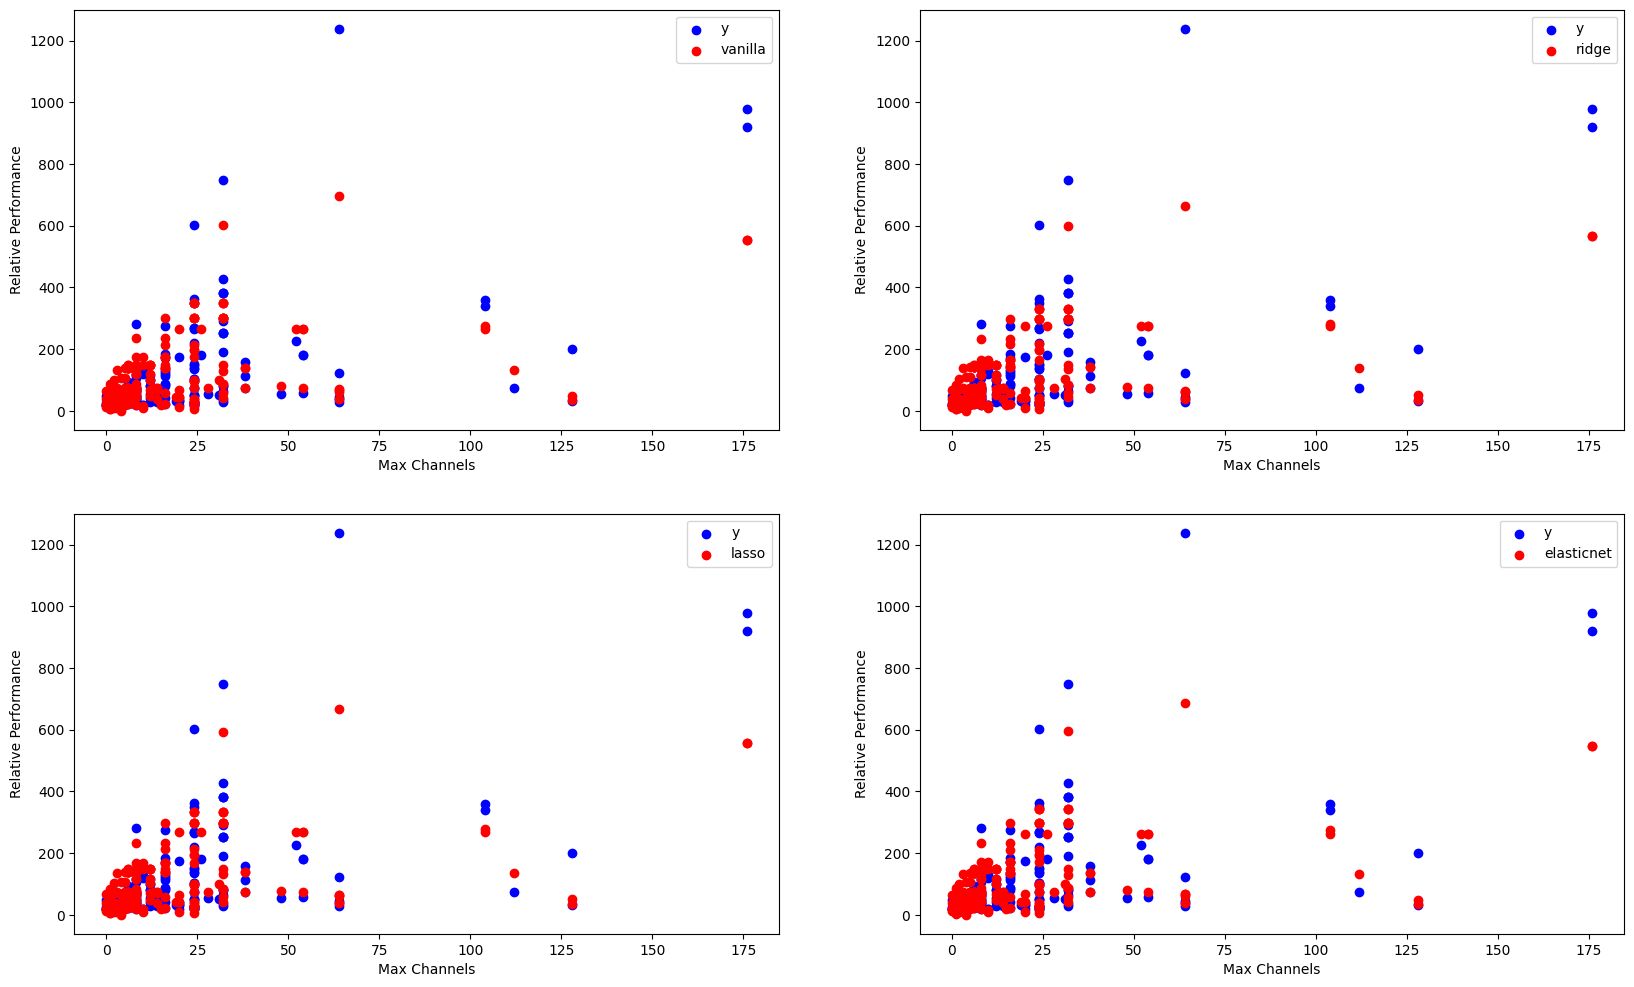

In [298]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.scatter(X[:,5], y, c='b', label='y')
plt.scatter(X[:,5], vanilla.predict(X),label='vanilla',c='r')
plt.xlabel('Max Channels')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(X[:,5], y, c='b', label='y')
plt.scatter(X[:,5], ridge.predict(X),label='ridge',c='r')
plt.xlabel('Max Channels')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(X[:,5], y, c='b', label='y')
plt.scatter(X[:,5], lasso.predict(X),label='lasso',c='r')
plt.xlabel('Max Channels')
plt.ylabel('Relative Performance')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(X[:,5], y, c='b', label='y')
plt.scatter(X[:,5], elasticnet.predict(X),label='elasticnet',c='r')
plt.xlabel('Max Channels')
plt.ylabel('Relative Performance')
plt.legend()

# Combined Cycle Power Plant

In [299]:
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=294)

X = np.array(energy_efficiency.data.features)
y = np.array(energy_efficiency.data.targets).reshape(-1)

print(X)
print(y)
print(X.shape)
print(y.shape)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]
(9568, 4)
(9568,)


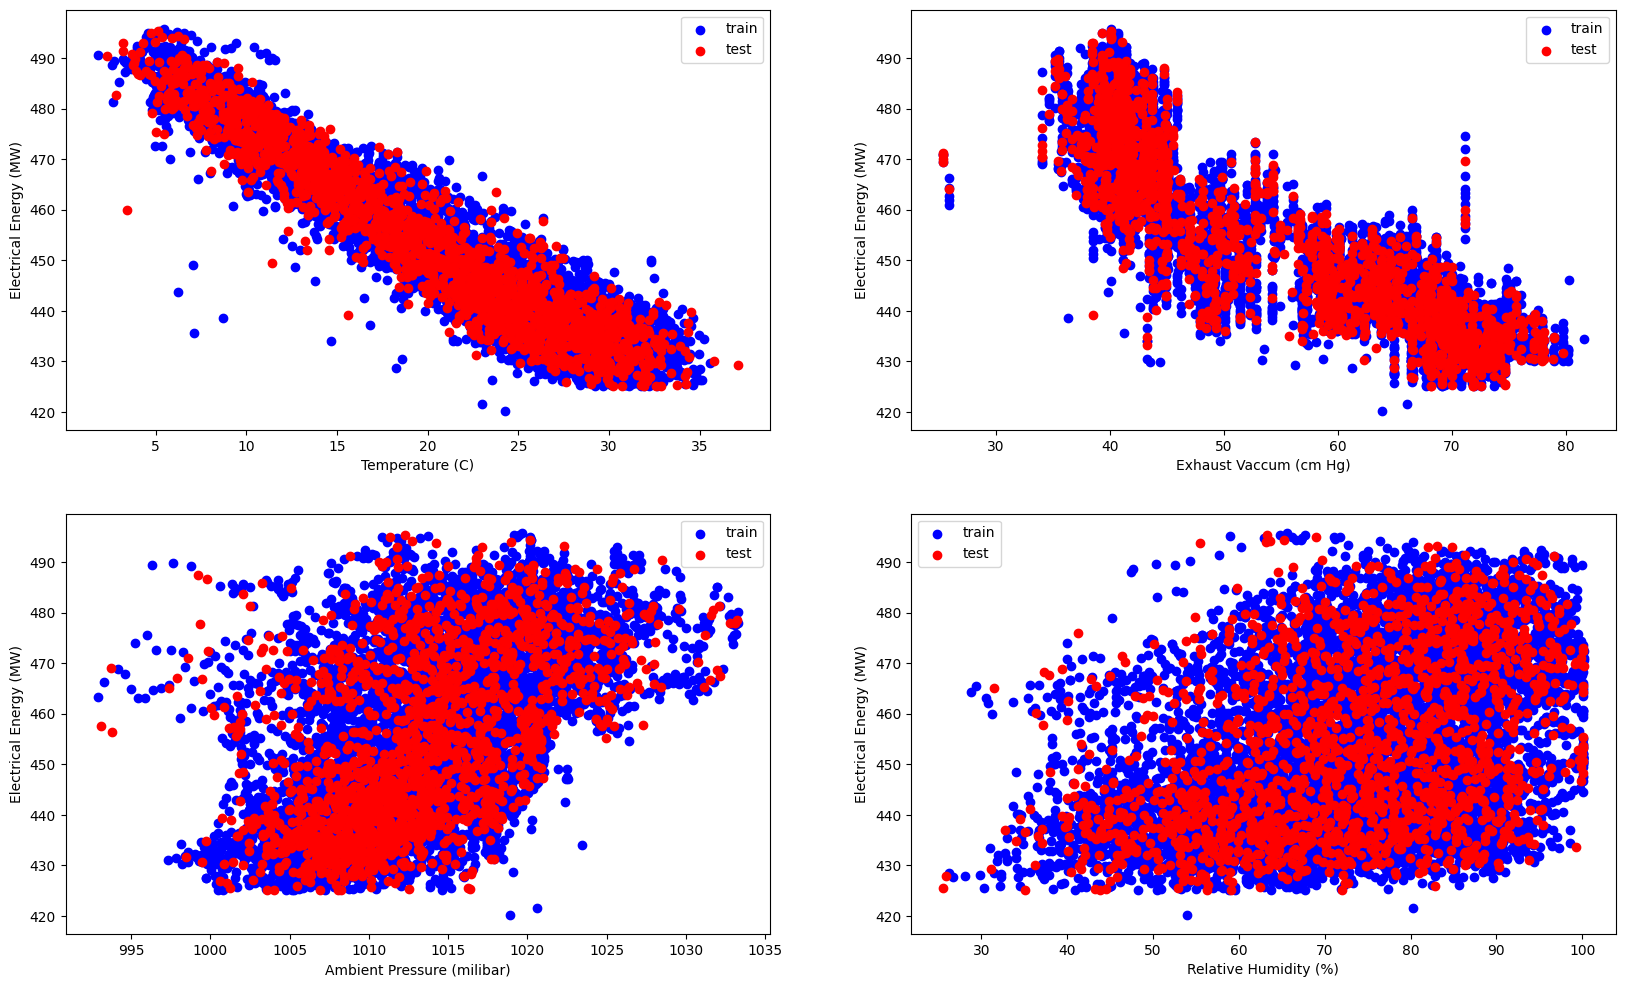

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.scatter(X_train[:,0],y_train, c='b', label='train')
plt.scatter(X_test[:,0],y_test, c='r', label='test')
plt.xlabel('Temperature (C)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(X_train[:,1],y_train, c='b', label='train')
plt.scatter(X_test[:,1],y_test, c='r', label='test')
plt.xlabel('Exhaust Vaccum (cm Hg)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(X_train[:,2],y_train, c='b', label='train')
plt.scatter(X_test[:,2],y_test, c='r', label='test')
plt.xlabel('Ambient Pressure (milibar)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(X_train[:,3],y_train, c='b', label='train')
plt.scatter(X_test[:,3],y_test, c='r', label='test')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()

In [301]:
vanilla = SGDRegressor(penalty=None, eta0=0.0000001)
ridge = SGDRegressor(penalty="l2", alpha=0.5, eta0=0.0000001)
lasso = SGDRegressor(penalty="l1", alpha=0.5, eta0=0.0000001)
elasticnet = SGDRegressor(penalty="elasticnet", alpha=0.5, eta0=0.0000001)

In [302]:
vanilla.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elasticnet.fit(X_train, y_train)

y_hat_vanilla = vanilla.predict(X_test)
y_hat_ridge = ridge.predict(X_test)
y_hat_lasso = lasso.predict(X_test)
y_hat_elasticnet = elasticnet.predict(X_test)

print(y_hat_vanilla)
print(y_hat_ridge)
print(y_hat_lasso)
print(y_hat_elasticnet)

[459.64958036 434.63977015 437.69170184 ... 473.46515365 439.18692277
 448.17349277]
[460.0662509  435.0887939  438.14079425 ... 473.85796699 439.63921816
 448.61987441]
[459.84454648 434.92271932 437.96898865 ... 473.57764376 439.45918098
 448.38608839]
[460.00805944 435.03851801 438.30567739 ... 473.54831792 439.85254449
 448.64286827]


In [303]:
print(vanilla.score(X_test, y_test))
print(ridge.score(X_test, y_test))
print(lasso.score(X_test, y_test))
print(elasticnet.score(X_test, y_test))

0.8644217769352499
0.8639576674995373
0.8638012136879011
0.8620429699578989


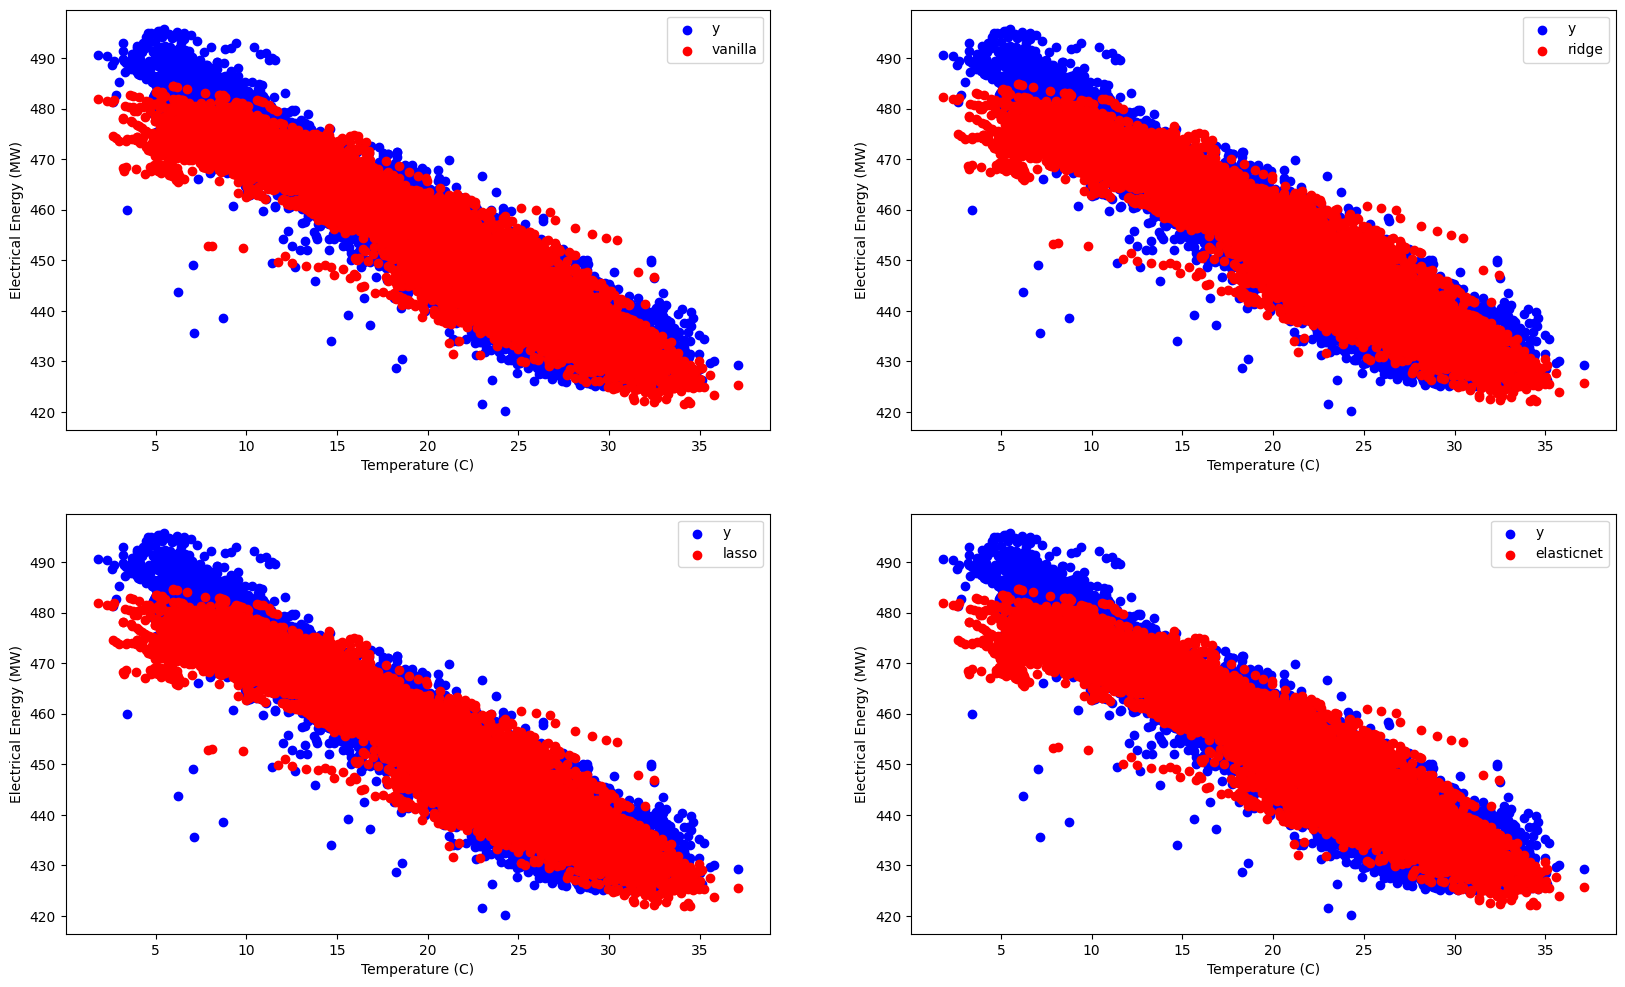

In [304]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.scatter(X[:,0], y, c='b', label='y')
plt.scatter(X[:,0], vanilla.predict(X),label='vanilla',c='r')
plt.xlabel('Temperature (C)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(X[:,0], y, c='b', label='y')
plt.scatter(X[:,0], ridge.predict(X),label='ridge',c='r')
plt.xlabel('Temperature (C)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(X[:,0], y, c='b', label='y')
plt.scatter(X[:,0], lasso.predict(X),label='lasso',c='r')
plt.xlabel('Temperature (C)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(X[:,0], y, c='b', label='y')
plt.scatter(X[:,0], elasticnet.predict(X),label='elasticnet',c='r')
plt.xlabel('Temperature (C)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()

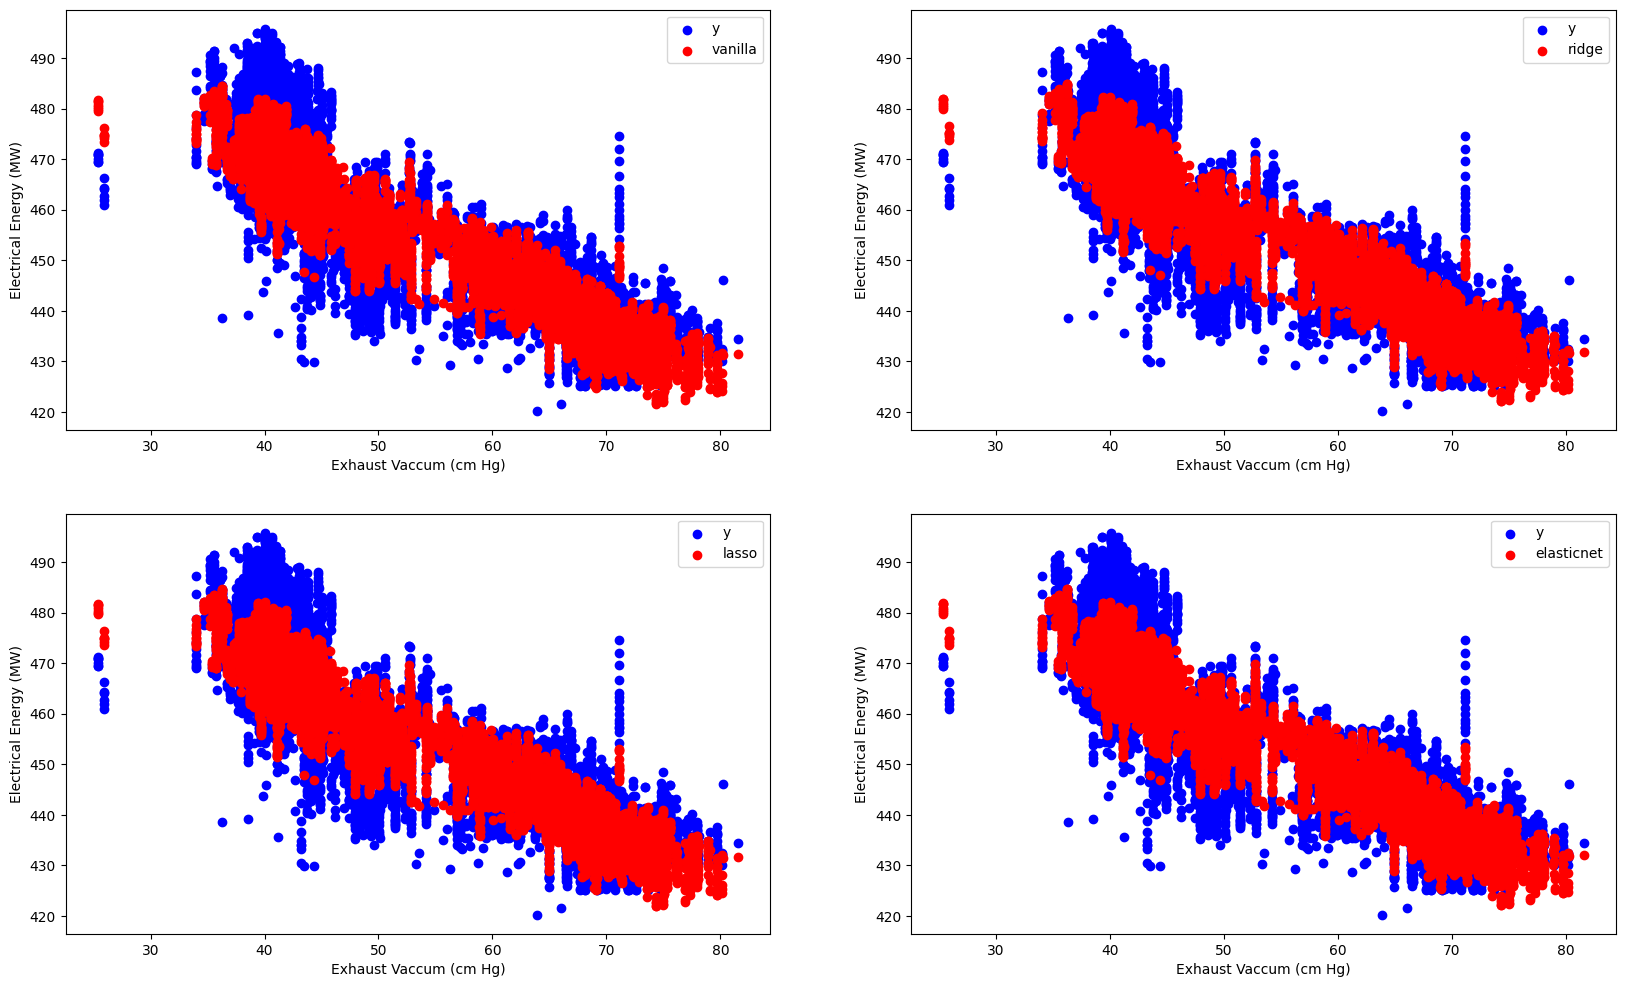

In [305]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.scatter(X[:,1], y, c='b', label='y')
plt.scatter(X[:,1], vanilla.predict(X),label='vanilla',c='r')
plt.xlabel('Exhaust Vaccum (cm Hg)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(X[:,1], y, c='b', label='y')
plt.scatter(X[:,1], ridge.predict(X),label='ridge',c='r')
plt.xlabel('Exhaust Vaccum (cm Hg)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(X[:,1], y, c='b', label='y')
plt.scatter(X[:,1], lasso.predict(X),label='lasso',c='r')
plt.xlabel('Exhaust Vaccum (cm Hg)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(X[:,1], y, c='b', label='y')
plt.scatter(X[:,1], elasticnet.predict(X),label='elasticnet',c='r')
plt.xlabel('Exhaust Vaccum (cm Hg)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()

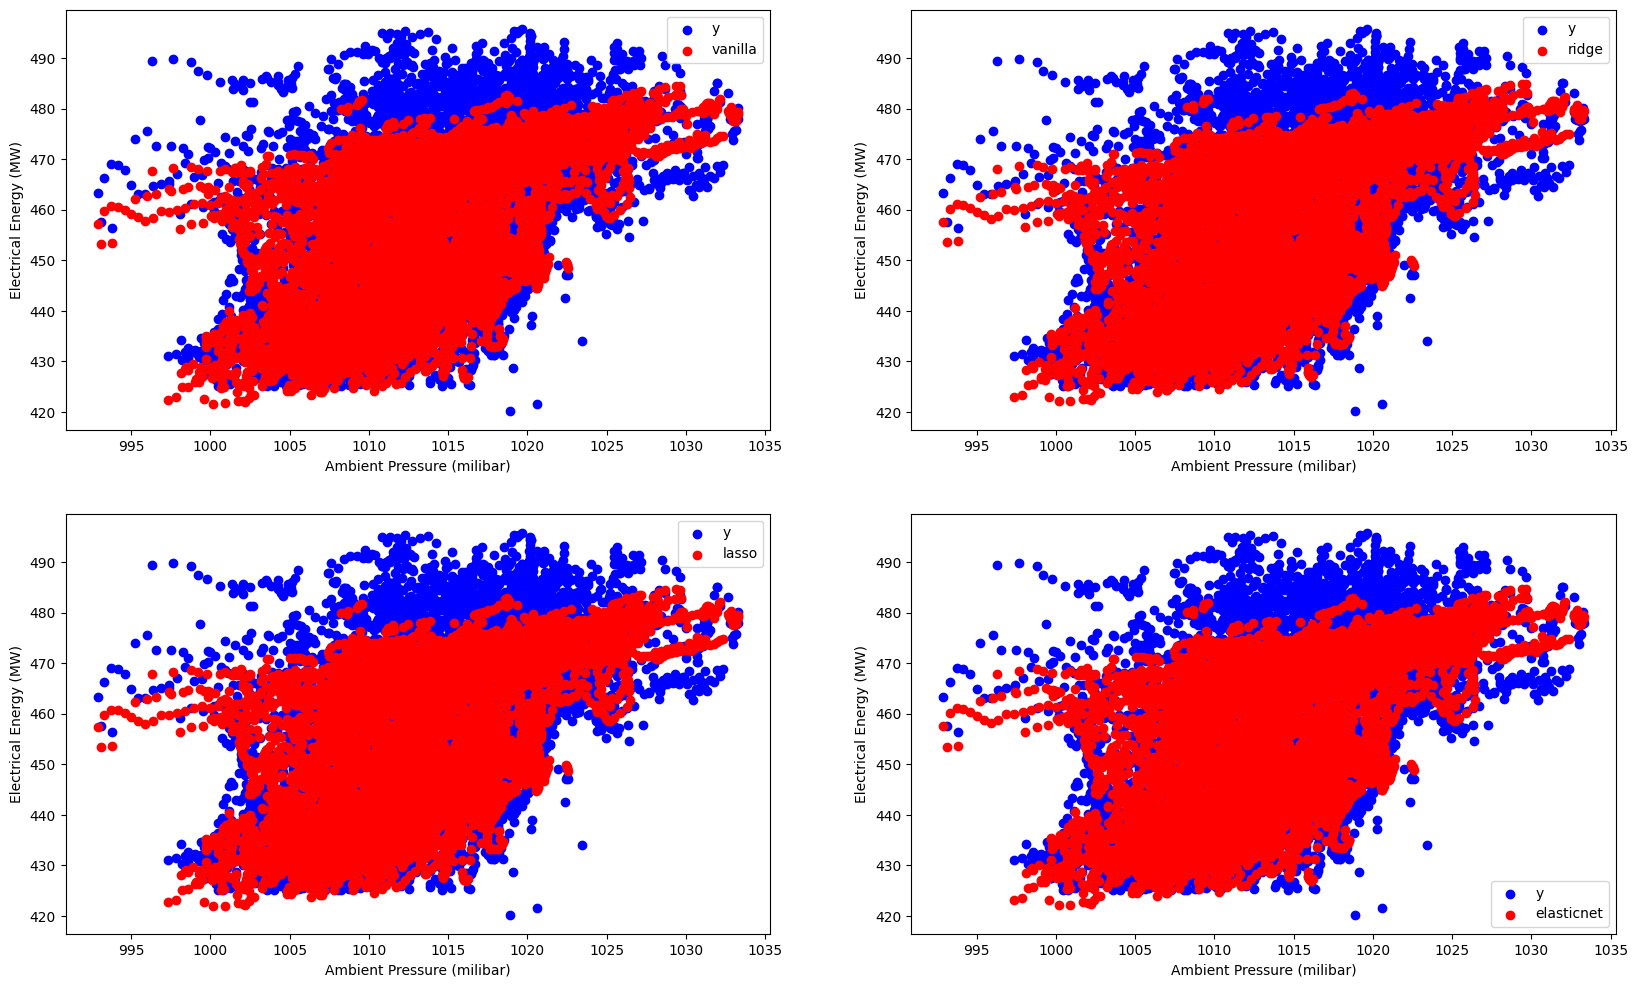

In [306]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.scatter(X[:,2], y, c='b', label='y')
plt.scatter(X[:,2], vanilla.predict(X),label='vanilla',c='r')
plt.xlabel('Ambient Pressure (milibar)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(X[:,2], y, c='b', label='y')
plt.scatter(X[:,2], ridge.predict(X),label='ridge',c='r')
plt.xlabel('Ambient Pressure (milibar)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(X[:,2], y, c='b', label='y')
plt.scatter(X[:,2], lasso.predict(X),label='lasso',c='r')
plt.xlabel('Ambient Pressure (milibar)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(X[:,2], y, c='b', label='y')
plt.scatter(X[:,2], elasticnet.predict(X),label='elasticnet',c='r')
plt.xlabel('Ambient Pressure (milibar)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()

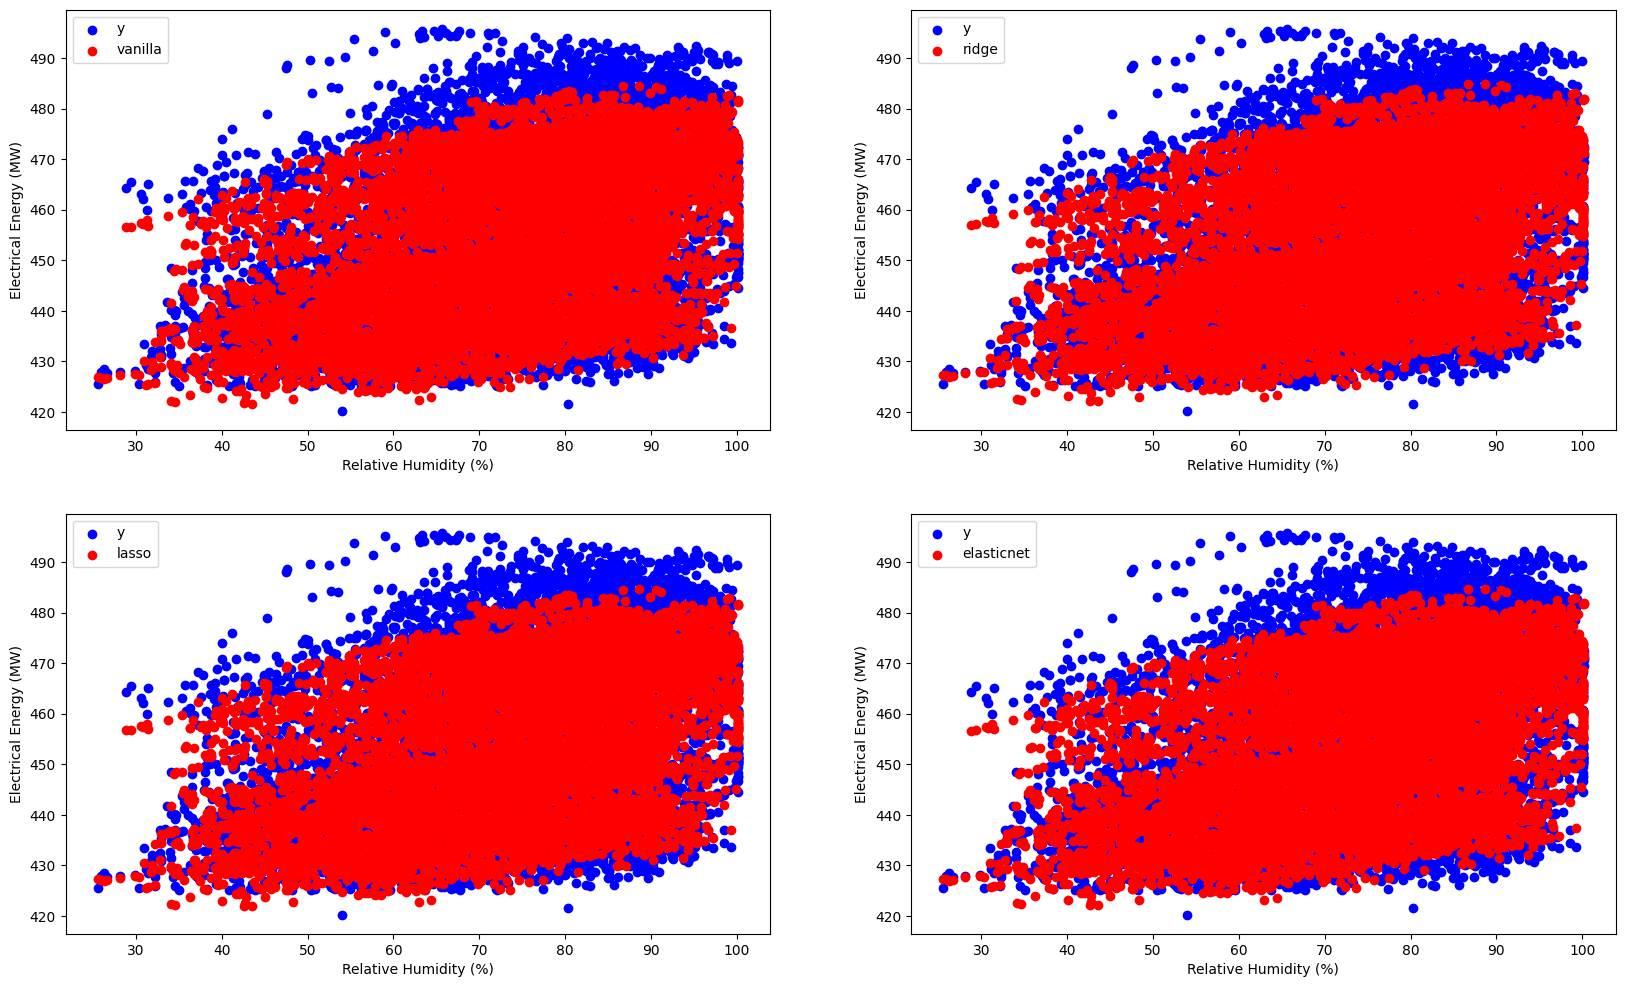

In [307]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.scatter(X[:,3], y, c='b', label='y')
plt.scatter(X[:,3], vanilla.predict(X),label='vanilla',c='r')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(X[:,3], y, c='b', label='y')
plt.scatter(X[:,3], ridge.predict(X),label='ridge',c='r')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(X[:,3], y, c='b', label='y')
plt.scatter(X[:,3], lasso.predict(X),label='lasso',c='r')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(X[:,3], y, c='b', label='y')
plt.scatter(X[:,3], elasticnet.predict(X),label='elasticnet',c='r')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Electrical Energy (MW)')
plt.legend()